In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tabgan.sampler import OriginalGenerator, GANGenerator
import logging
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sksurv.ensemble import RandomSurvivalForest

In [2]:
# manage warnings
logging.basicConfig(filename="myfile.txt",level=logging.DEBUG)
logging.captureWarnings(True)
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('prepared_for_rsf_KNN_imputation.csv')


In [4]:
random_state = 20
df = df.sample(frac=1.0, random_state=random_state)

df = pd.get_dummies(data=df)
df['dead'] = df['dead'] - 1 #now dead is 0 and not-dead is 1
df.columns

Index(['Y', 'AF', 'AQ', 'AY', 'BC', 'BE', 'BG', 'BH', 'BI', 'BL', 'BM', 'BP',
       'CY', 'DC', 'DE', 'DT', 'DW', 'DX', 'DY', 'EZ', 'Age', 'metastasis',
       'dead', 'secondprim'],
      dtype='object')

Text(0.5, 1.0, 'dead patients')

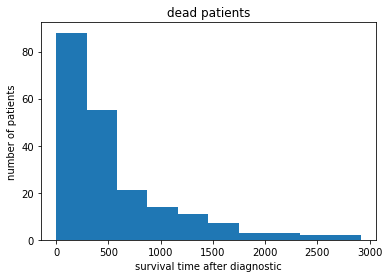

In [5]:
surv = df[df['dead'] == 0]['EZ']
# sns.distplot(surv, hist=True)
plt.hist(surv)
plt.xlabel('survival time after diagnostic')
plt.ylabel('number of patients')
plt.title('dead patients')

In [6]:
data_train, data_test = train_test_split(
    df, test_size=0.20, random_state=random_state) # split train/test data.

In [7]:
frame = {'target': data_train['dead']}
target_train_death = pd.DataFrame(frame) # death in training data

frame = {'target': data_test['dead']}
target_test_death = pd.DataFrame(frame) # death in testing data

data_x_train = data_train.drop(columns=['dead', 'EZ']) # train data without target features i.e. dead and EZ.
data_x_test = data_test.drop(columns=['dead', 'EZ']) # test data without target features i.e. dead and EZ.

data_x_train_dead = data_train[data_train['dead'] == 0] # training data for dead people
data_x_test_dead = data_test[data_test['dead'] == 0] # testing data for dead people

data_x_train_alive = data_train[data_train['dead'] == 1] # training data for alive people
data_x_test_alive = data_test[data_test['dead'] == 1] # testing data for alive people

frame = {'target': data_x_train_dead['EZ']}
target_train_dead_EZ = pd.DataFrame(frame) # EZ of people in training who are dead.

frame = {'target': data_x_train_alive['EZ']}
target_train_alive_EZ = pd.DataFrame(frame) # EZ of people in training who are alive.

data_x_train_dead = data_x_train_dead.drop(columns=['dead', 'EZ']) # getting rid of target features i.e. dead and EZ.
data_x_test_dead = data_x_test_dead.drop(columns=['dead', 'EZ']) # getting rid of target features i.e. dead and EZ.
data_x_train_alive = data_x_train_alive.drop(columns=['dead', 'EZ']) # getting rid of target features i.e. dead and EZ.
data_x_test_alive = data_x_test_alive.drop(columns=['dead', 'EZ']) # getting rid of target features i.e. dead and EZ.

In [8]:
cat_cols = ['Y', 'AF', 'AQ', 'AY', 'BE', 'BG', 'BH', 'BI', 'BL', 'BM', 'BP',
       'CY', 'DC', 'DE', 'DT', 'DW', 'DX', 'DY', 'metastasis', 'secondprim']

# generate date for dead people

new_train_dead_org, new_target_dead_org = OriginalGenerator(gen_x_times=1.1, cat_cols=cat_cols, bot_filter_quantile=0.001,
                                       top_filter_quantile=0.999,
                                       is_post_process=True,
                                       adversaial_model_params={
                                           "metrics": "AUC", "max_depth": 2,
                                           "max_bin": 100, "n_estimators": 500,
                                           "learning_rate": 0.02, "random_state": 42,
                                       }, pregeneration_frac=2, only_generated_data=False,
                                       epochs=500).generate_data_pipe(data_x_train_dead, target_train_dead_EZ, data_x_test_dead,
                                                                      deep_copy=True,
                                                                      only_adversarial=False,
                                                                      use_adversarial=True)

new_train_dead_gan, new_target_dead_gan = GANGenerator(gen_x_times=1.1, cat_cols=cat_cols, bot_filter_quantile=0.001,
                                       top_filter_quantile=0.999,
                                       is_post_process=True,
                                       adversaial_model_params={
                                           "metrics": "AUC", "max_depth": 2,
                                           "max_bin": 100, "n_estimators": 500,
                                           "learning_rate": 0.02, "random_state": 42,
                                       }, pregeneration_frac=2, only_generated_data=False,
                                       epochs=500).generate_data_pipe(data_x_train_dead, target_train_dead_EZ, data_x_test_dead,
                                                                      deep_copy=True,
                                                                      only_adversarial=False,
                                                                      use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/23 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
print(new_train_dead_org.shape, new_target_dead_org.shape)
print(new_train_dead_gan.shape, new_target_dead_gan.shape)
data_x_train_dead.shape

(383, 22) (383,)
(323, 22) (323,)


(160, 22)

In [10]:
# generate data for alive people
    


new_train_alive_org, new_target_alive_org = OriginalGenerator(gen_x_times=1.1, cat_cols=cat_cols, bot_filter_quantile=0.001,
                                   top_filter_quantile=0.999,
                                   is_post_process=True,
                                   adversaial_model_params={
                                       "metrics": "AUC", "max_depth": 2,
                                       "max_bin": 100, "n_estimators": 500,
                                       "learning_rate": 0.02, "random_state": 42,
                                   }, pregeneration_frac=2, only_generated_data=False,
                                   epochs=500).generate_data_pipe(data_x_train_alive, target_train_alive_EZ, data_x_test_alive,
                                                                  deep_copy=True,
                                                                  only_adversarial=False,
                                                                  use_adversarial=True)

new_train_alive_gan, new_target_alive_gan = GANGenerator(gen_x_times=1.1, cat_cols=cat_cols, bot_filter_quantile=0.001,
                                   top_filter_quantile=0.999,
                                   is_post_process=True,
                                   adversaial_model_params={
                                       "metrics": "AUC", "max_depth": 2,
                                       "max_bin": 100, "n_estimators": 500,
                                       "learning_rate": 0.02, "random_state": 42,
                                   }, pregeneration_frac=2, only_generated_data=False,
                                   epochs=500).generate_data_pipe(data_x_train_alive, target_train_alive_EZ, data_x_test_alive,
                                                                  deep_copy=True,
                                                                  only_adversarial=False,
                                                                  use_adversarial=True)

Fitting CTGAN transformers for each column:   0%|          | 0/23 [00:00<?, ?it/s]

Training CTGAN, epochs::   0%|          | 0/500 [00:00<?, ?it/s]

In [11]:
new_train_alive_gan.shape
data_x_train_alive.shape

(260, 22)

In [12]:
new_train_dead_org['dead'] = None
new_train_dead_org['EZ'] = None
new_train_dead_org['EZ'] = new_target_dead_org

new_train_alive_org['dead'] = None
new_train_alive_org['EZ'] = None
new_train_alive_org['EZ'] = new_target_alive_org

new_train_dead_org['dead'] = 0
new_train_alive_org['dead'] = 1
train_org = pd.concat([new_train_dead_org, new_train_alive_org])

In [13]:
new_train_dead_gan['dead'] = None
new_train_dead_gan['EZ'] = None
new_train_dead_gan['EZ'] = new_target_dead_gan

new_train_alive_gan['dead'] = None
new_train_alive_gan['EZ'] = None
new_train_alive_gan['EZ'] = new_target_alive_gan

new_train_dead_gan['dead'] = 0
new_train_alive_gan['dead'] = 1
train_gan = pd.concat([new_train_dead_gan, new_train_alive_gan])

In [14]:
train_org.head(10)

,Y,AF,AQ,AY,BC,BE,BG,BH,BI,BL,...,DE,DT,DW,DX,DY,Age,metastasis,secondprim,dead,EZ
0,2.0,2.0,2.0,3.0,3.5,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,77.0,2.0,2.0,0,676.0
1,2.0,2.0,2.0,3.0,3.5,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,77.0,2.0,2.0,0,676.0
2,2.0,2.0,2.0,3.0,3.5,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,77.0,2.0,2.0,0,676.0
3,2.0,2.0,2.0,3.0,3.5,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,77.0,2.0,2.0,0,676.0
4,2.0,2.0,2.0,3.0,3.5,2.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,77.0,2.0,2.0,0,676.0
5,2.0,2.0,2.0,2.0,5.0,5.0,1.0,1.0,2.0,1.0,...,1.0,1.0,2.0,1.0,2.0,78.0,2.0,2.0,0,392.0
6,2.0,1.0,2.0,2.0,2.4,7.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,74.0,2.0,2.0,0,371.0
7,2.0,1.0,2.0,2.0,2.4,7.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,74.0,2.0,2.0,0,371.0
8,2.0,1.0,2.0,3.0,4.7,2.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,75.0,2.0,2.0,0,409.0
9,2.0,2.0,2.0,3.0,3.7,1.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,76.0,2.0,2.0,0,1579.0


In [15]:
train_gan.columns

Index(['Y', 'AF', 'AQ', 'AY', 'BC', 'BE', 'BG', 'BH', 'BI', 'BL', 'BM', 'BP',
       'CY', 'DC', 'DE', 'DT', 'DW', 'DX', 'DY', 'Age', 'metastasis',
       'secondprim', 'dead', 'EZ'],
      dtype='object')

In [16]:
# produce y needed for random survival forest
# 0 dead/ 1 alive
def get_survival_data(data):
    return np.array(list(zip(data['dead'].replace(0, 2).replace(1, False).replace(2, True), data['EZ'])),
             dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

    
# produce X, y from data for random survival forest
def prepare_data_for_rsf(data):
    Xt = data.drop(columns=['dead', 'EZ'])
    Xt = Xt.to_numpy()
    y = get_survival_data(data)
    return Xt, y


In [69]:
train_org = train_org.sample(frac=1, random_state=random_state)
train_org.head(10)

,Y,AF,AQ,AY,BC,BE,BG,BH,BI,BL,...,DE,DT,DW,DX,DY,Age,metastasis,secondprim,dead,EZ
358,1.0,1.0,4.0,2.0,3.4,3.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,57.0,2.0,2.0,0,197.0
213,2.0,2.0,2.0,3.0,3.0,2.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,1.0,2.0,68.0,2.0,2.0,0,1077.0
595,2.0,2.0,2.0,2.0,3.1,1.0,1.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,33.0,2.0,2.0,1,10000.0
389,2.0,2.0,2.0,3.0,1.4,3.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,2.0,1.0,69.0,2.0,2.0,1,475.0
131,2.0,1.0,2.0,3.0,1.5,2.0,1.0,1.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,66.0,2.0,2.0,1,10000.0
197,2.0,2.0,2.0,3.0,3.5,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,75.0,2.0,2.0,0,537.0
346,2.0,2.0,2.0,3.0,2.8,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,2.0,1.0,1.0,55.0,2.0,2.0,0,272.0
207,2.0,2.0,2.0,2.0,3.0,3.0,1.0,2.0,2.0,1.0,...,2.0,2.0,2.0,2.0,2.0,75.0,2.0,2.0,1,10000.0
58,2.0,1.0,1.0,3.0,6.0,8.0,1.0,2.0,2.0,1.0,...,1.0,2.0,2.0,2.0,2.0,75.0,2.0,2.0,0,1.0
218,2.0,2.0,6.0,3.0,2.7,4.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,2.0,58.0,2.0,2.0,1,56.0


In [17]:
train_gan = train_gan.sample(frac=1, random_state=random_state)
train_gan.head(10)

,Y,AF,AQ,AY,BC,BE,BG,BH,BI,BL,...,DE,DT,DW,DX,DY,Age,metastasis,secondprim,dead,EZ
122,2.0,2.0,1.0,3.0,6.939468,2.0,1.0,1.0,2.0,1.0,...,3.0,1.0,1.0,2.0,2.0,34.279947,2.0,2.0,1,11181.205424
349,2.0,2.0,2.0,2.0,2.642425,2.0,1.0,2.0,2.0,1.0,...,2.0,2.0,1.0,2.0,2.0,43.471744,2.0,2.0,1,1571.805992
223,2.0,1.0,2.0,2.0,6.858190,2.0,1.0,1.0,2.0,1.0,...,2.0,2.0,2.0,1.0,2.0,50.067928,2.0,2.0,1,10594.653910
119,2.0,2.0,6.0,3.0,2.700000,4.0,2.0,1.0,1.0,1.0,...,1.0,1.0,1.0,2.0,2.0,57.000000,2.0,2.0,0,56.000000
306,1.0,2.0,2.0,2.0,4.318654,6.0,1.0,2.0,1.0,1.0,...,2.0,1.0,1.0,1.0,2.0,35.427444,2.0,2.0,0,-152.022292
567,2.0,1.0,2.0,3.0,3.700000,1.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,52.000000,2.0,2.0,1,2121.000000
204,2.0,2.0,1.0,2.0,4.446210,2.0,1.0,1.0,1.0,1.0,...,2.0,2.0,2.0,2.0,2.0,45.898666,2.0,2.0,1,2276.099474
450,2.0,2.0,2.0,2.0,2.061504,6.0,1.0,2.0,2.0,1.0,...,1.0,1.0,2.0,2.0,2.0,53.171304,2.0,2.0,1,2816.198930
213,2.0,2.0,2.0,3.0,5.645075,5.0,1.0,1.0,2.0,1.0,...,2.0,1.0,1.0,2.0,2.0,51.255403,2.0,2.0,1,2378.086112
637,2.0,2.0,1.0,2.0,1.300000,3.0,1.0,2.0,2.0,1.0,...,1.0,1.0,1.0,2.0,2.0,56.000000,2.0,2.0,1,272.000000


In [18]:
Xt, y = prepare_data_for_rsf(train_gan)

In [19]:
Xt.shape, y.shape

((1019, 22), (1019,))

In [20]:
rsf = RandomSurvivalForest(n_estimators=1000,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=random_state)
rsf.fit(Xt, y)
print(rsf.score(Xt, y)) # Training Error

0.87326185589927


In [21]:
Xt, y = prepare_data_for_rsf(data_test)
print(rsf.score(Xt, y)) # Test Error

0.7806868412104726


In [23]:
train_org.to_csv('orginal_augmentation.csv')
train_gan.to_csv('gan_augmentation.csv')